Do an Exploratory Data Analysis, including the necessary data transformation and cleaning, on the data (or a part of) you have decided to use for your business case. That is, load the data into R in a Jupyter notebook. Look at what variables you have and what their scale of measurement and types are. Do the necessary transformation such that the variables are in a format in R you can work with. Then investigate the individual variables and their distribution using plotting and descriptive statistics. Finally, select some pairs of variable for which you think their could be an interesting relationship and plot the relationship and calculate the relevant descriptive statistics. Finally, upload the notebook here.

<h1> Exploratory data analysis <h1>
<h3> <i>The chosen business case for this course is based on the dataset “Employee Attrition”, which consists of 35 columns and approximately 1400 rows of data about an organization’s employees. The dataset is found on the website “Kaggle.com” in a notebook. 
The goal of this business case is to find patterns in the data using analysis, that can tell us why workers quit their job <i> <h3>

<h2> Loading the data <h2>

In [143]:
# git_url <- "https://github.com/Hammi007/R_bigdata/blob/3e35e40e35a28f7e460bac125f9b63384c1cc4f3/Employee_Attrition.csv"
# data <- read.csv(git_url, header = TRUE, stringsAsFactors = FALSE)
df <- read.csv("Employee_Attrition.csv", header = TRUE, stringsAsFactors = FALSE, strip.white = TRUE)


<h2> Exploring the basics of the dataset <h2>


In [144]:
#We see that the dataset contains 1470 rows and 35 coloumns.
dim(df)

# Through the str() function we see the different datatypes and can conclude that, only two datatypes are used: int and chr.
str(df)

# This also applies for columns with binary output eg. 'Attrition' with "yes"/"no" values, or columns a few multiple values eg BusinessTravel with three diffent values.
unique(df$BusinessTravel)

# In the dataset we also see, that there is no missing values NA.
table(is.na(df))

[1] 1470   35

'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : chr  "Yes" "No" "Yes" "No" ...
 $ BusinessTravel          : chr  "Travel_Rarely" "Travel_Frequently" "Travel_Rarely" "Travel_Frequently" ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : chr  "Sales" "Research & Development" "Research & Development" "Research & Development" ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : chr  "Female" "Male" "Male" "Female" ...
 $ HourlyRate              : int  94 61 92 56 40 79 8

[1] "Travel_Rarely"     "Travel_Frequently" "Non-Travel"


FALSE 
51450 

<h2> Cleaning the data <h2>
<h4> After exploring the overall structure of the data, we want to conduct the following transformation-steps: <br><br>
    <i>
        step 1: Remove irrelevant columns<br>
        step 2: Remove quotation ("") from the dataset <br>
        step 3: Transforming columns whith binary and a multiple values to factors.<br> 
    <i>
<h4>

In [145]:
#Step 1: Keeping a selection of relevant columns
selection <- c(
    "Age", "Attrition", "BusinessTravel", "DistanceFromHome", 
    "EducationField", "EnvironmentSatisfaction","Gender","HourlyRate",
    "JobInvolvement", "JobRole", "JobSatisfaction", "MaritalStatus",
    "MonthlyIncome", "NumCompaniesWorked", "OverTime", "RelationshipSatisfaction",
    "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany",	"YearsInCurrentRole",
    "YearsSinceLastPromotion"
)
df <- df[selection]

#Step 2,3: Converting multivalues to factors and remvoving quotation ""
df$Attrition <- factor(df$Attrition, levels = c("Yes", "No"), labels = c("Yes", "No"), ordered = TRUE)
df$BusinessTravel <- factor(df$BusinessTravel, levels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"), labels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"), ordered = TRUE)
df$EducationField <- factor(df$EducationField, levels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"), labels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"), ordered = TRUE)
df$EnvironmentSatisfaction <- factor(df$EnvironmentSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$Gender <- factor(df$Gender, levels = c("Male", "Female"), labels = c("Male", "Female"), ordered = TRUE)
df$JobInvolvement <- factor(df$JobInvolvement, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$JobRole <- factor(df$JobRole, levels = c("Sales Executive","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Sales Representative","Research Director","Human Resources"), labels = c("Sales Executive","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Sales Representative","Research Director","Human Resources"), ordered = TRUE)
df$JobSatisfaction <- factor(df$JobSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$MaritalStatus <- factor(df$MaritalStatus, levels = c("Single","Married","Divorced"), labels = c("Single","Married","Divorced"), ordered = TRUE)
df$OverTime <- factor(df$OverTime, levels = c("Yes", "No"), labels = c("Yes", "No"), ordered = TRUE)
df$RelationshipSatisfaction <- factor(df$RelationshipSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)
df$TrainingTimesLastYear <- factor(df$TrainingTimesLastYear, levels = c(0,1,2,3,4,5,6), labels = c(0,1,2,3,4,5,6), ordered = TRUE)
#df$WorkLifeBalance <- factor(df$WorkLifeBalance, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE)


<h2> Visualizing and understanding the data in depth <h2>
<h4> In this section we are using R-tools to furhter explore the data. Since our business case is havely based on attrition in a company, we will start with invenstigation the categorical value 'attrition' <br><br>
     
Attration is defines as: <i> "the gradual reduction of a workforce by employees leaving and not being replaced rather than by redundancy." <i> 
<!--
<br>
<br>
<br>
--> 
<i>
<h4>

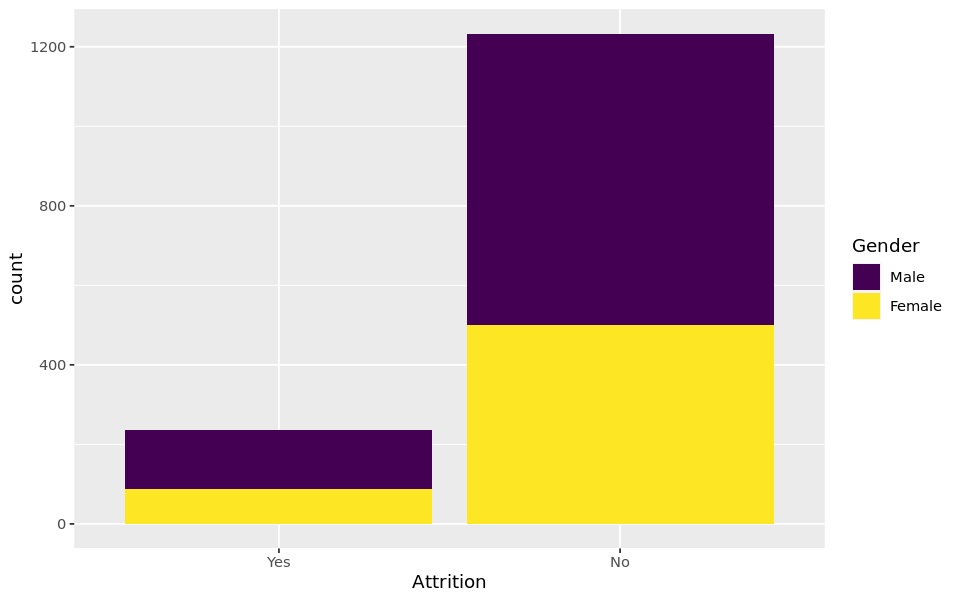

In [146]:
library(tidyverse); library(ggplot2)

options(repr.plot.width=8, repr.plot.height=5)

ggplot(df, aes(x = Attrition)) + geom_bar(aes(fill = Gender))

# Examening the value 'Attrition', we see that there is an imbalance as the majority of data can be found in the category 'no'.
# The dataset is skewed.

<h5>The plot above gives us an idea of what proportions the datasets entirty consists of based on Attrition. <br>We notice a skewness which we will consider in our future interpertations.<h5>
<h5 style="color:blue;">Also we will keep in mind the option to under/over sample the dataset for future classification purposes.<h5>

<h3>In the following we will try to further explore our data by visualizing: <br>
<h5>How does the following parameters influence the attrition:<h5>

<ul style = "">
  <li style = "margin-bottom: 10px;">DistanceFromHome</li>
  <li style = "margin-bottom: 10px;">JobSatisfaction</li>
  <li style = "margin-bottom: 10px;">MonthlyIncome</li>
</ul>


In [147]:
#Filter rows with attrition yes and no respectively:
df_yes <- filter(df, Attrition =='Yes')
df_no <- filter(df, Attrition =='No')

<h2>JobSatisfaction<h2>
<h4>In the following we see two visual representations of the Jobsatisfaction of the employees with Attrition: "No" and "Yes"<h4>

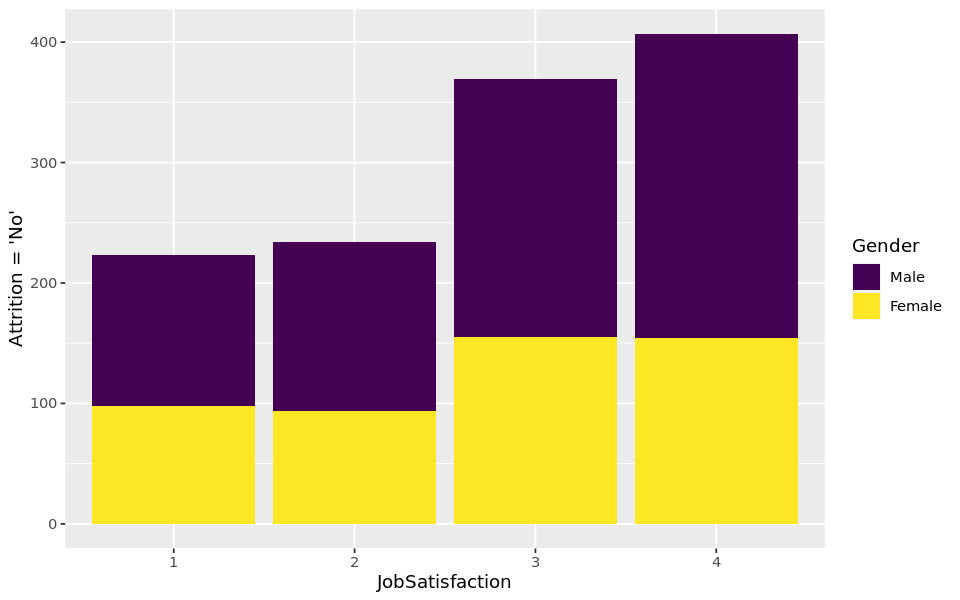

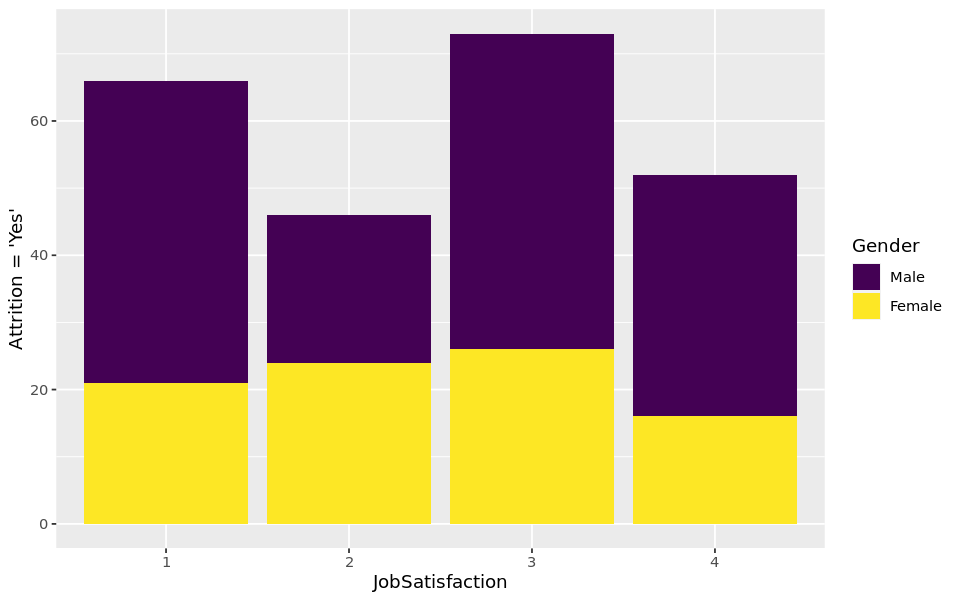

In [148]:
ggplot(df_no, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes'")

<h2>DistanceFromHome<h2>
<h4>In the following we see two visual representations of the employees DistanceFromHome with Attrition: "No" and "Yes"<h4>

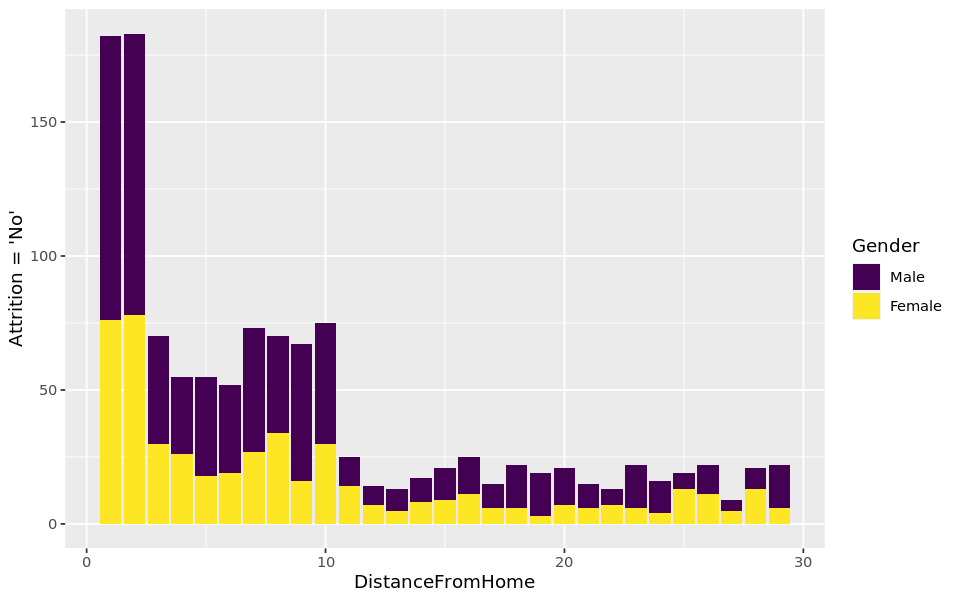

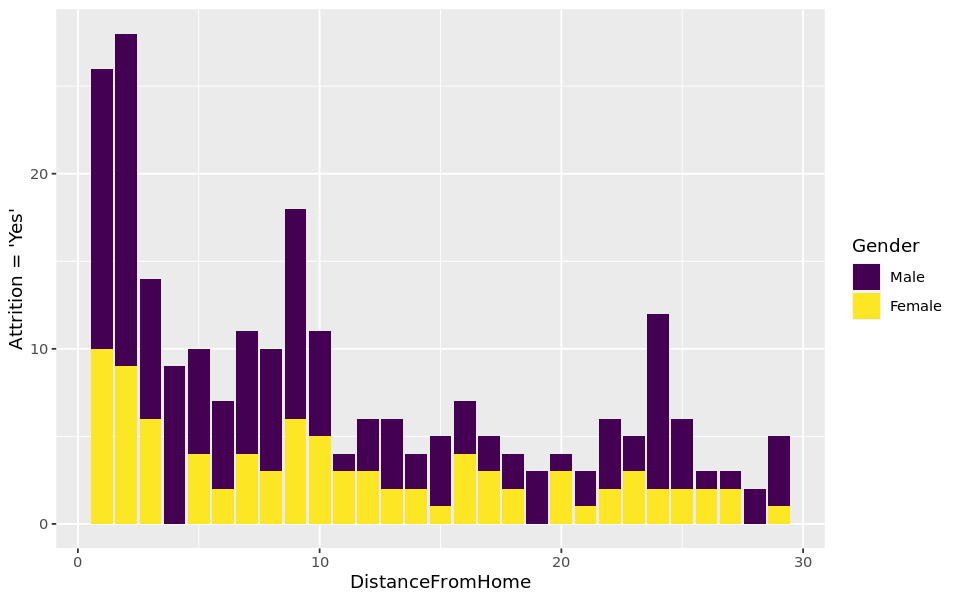

In [149]:
ggplot(df_no, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes'")


<h2>MonthlyIncome<h2> 
<h4>In the following we see two visual representations of the employees MonthlyIncome with Attrition: "No" and "Yes"<h4>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


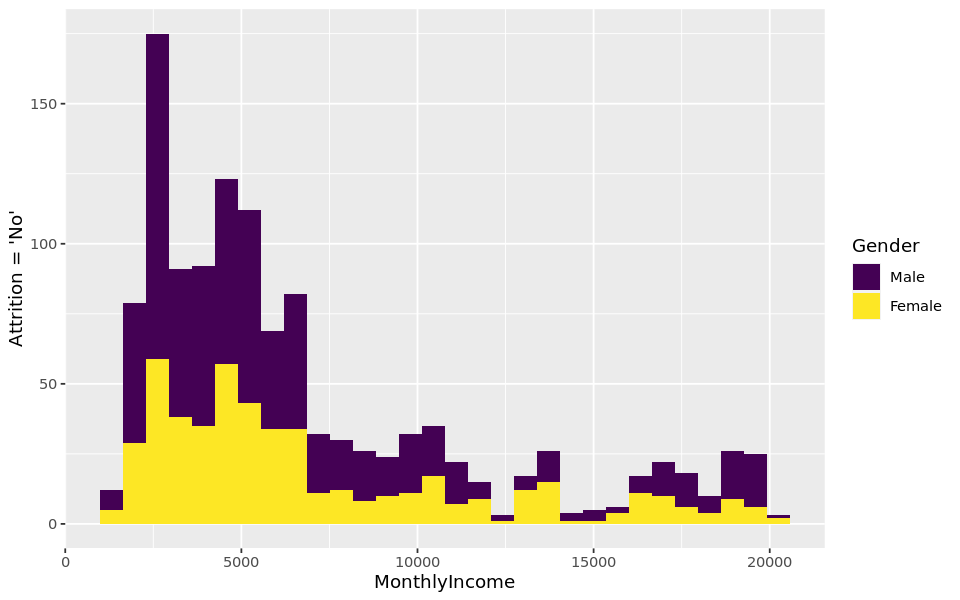

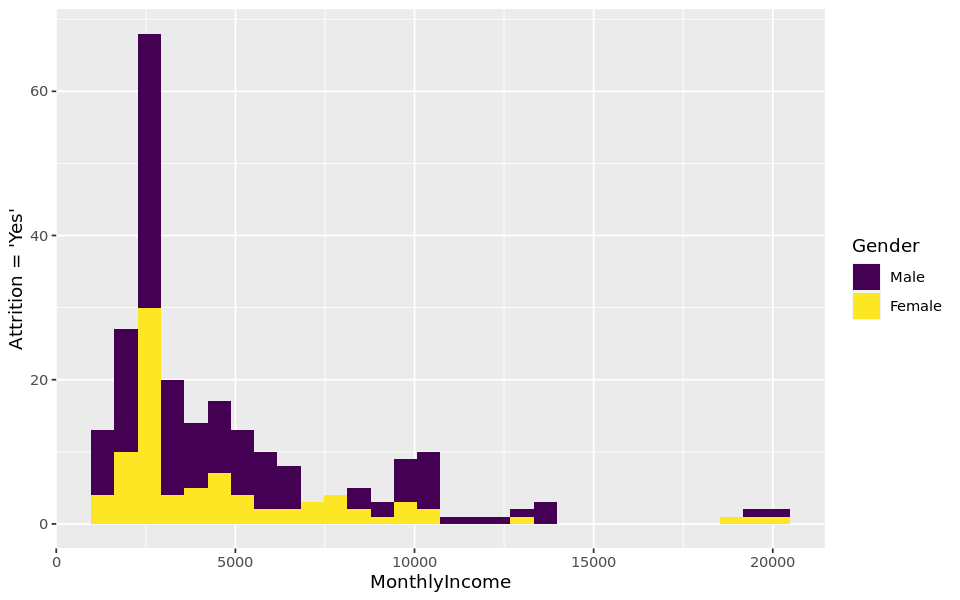

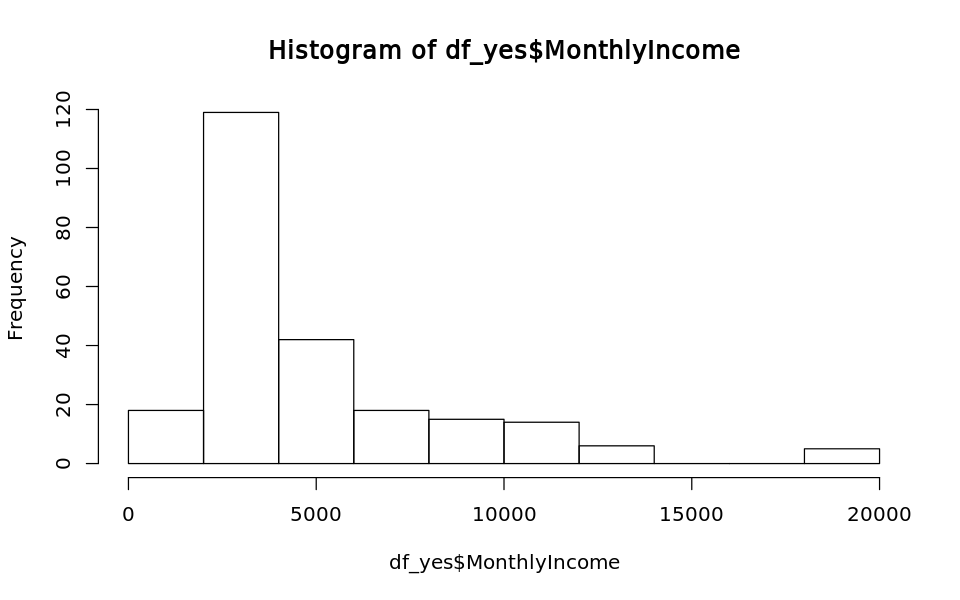

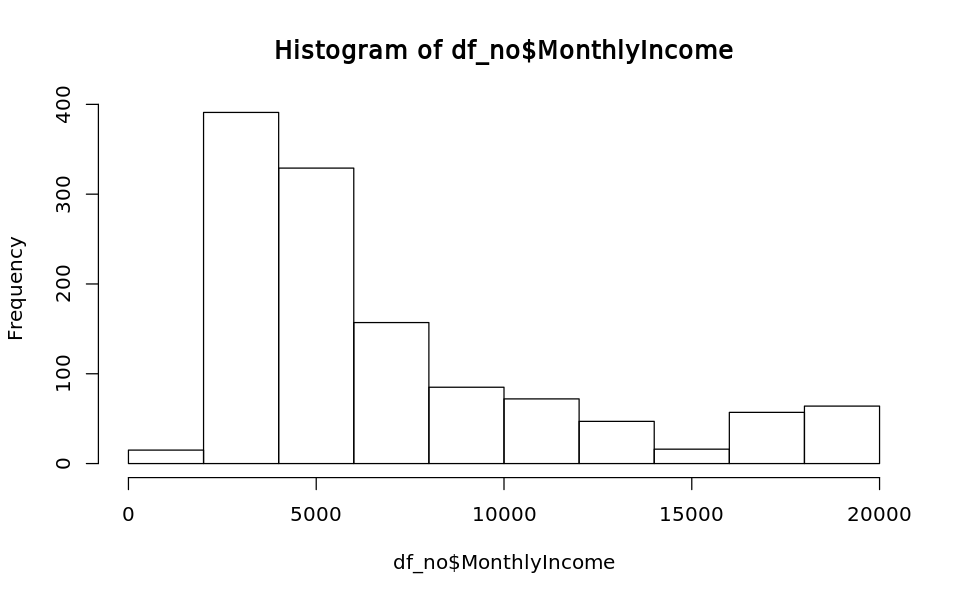

In [150]:
ggplot(df_no) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'No'")
ggplot(df_yes) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'Yes'")
hist(df_yes$MonthlyIncome)
hist(df_no$MonthlyIncome)

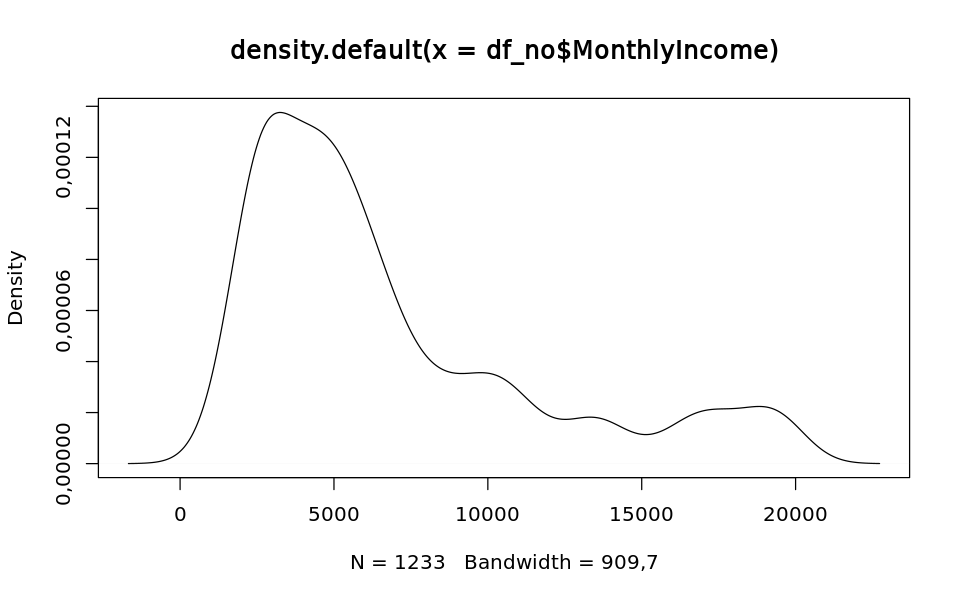

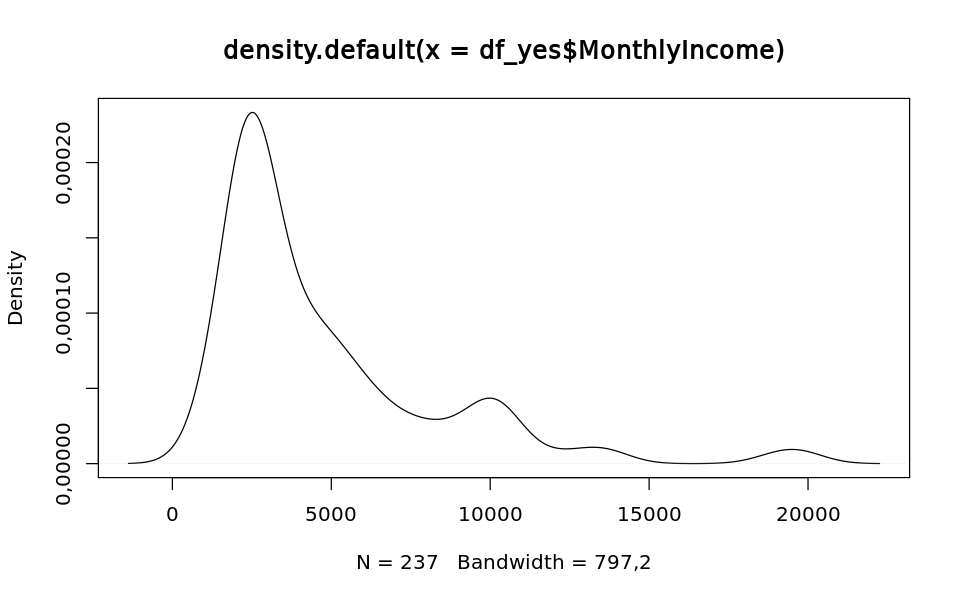

In [151]:
#Simple visualization of the distribution of MonthlyIncome
plot(density(df_no$MonthlyIncome))
plot(density(df_yes$MonthlyIncome))

<h3>Unsupervised learnin - clustering<h3>
<h5>In the following a clustering procedure is performed to designate an n amount of clusters for the data.<h5>

In [152]:
df$scaledAge <- as.numeric(scale(df$Age))
df$scaledIncome <- as.numeric(scale(df$MonthlyIncome))

data <- select(df, scaledAge, scaledIncome)
summary(data)
scaledData <- data
head(scaledData,3)

   scaledAge        scaledIncome    
 Min.   :-2,0715   Min.   :-1,1669  
 1st Qu.:-0,7579   1st Qu.:-0,7629  
 Median :-0,1011   Median :-0,3364  
 Mean   : 0,0000   Mean   : 0,0000  
 3rd Qu.: 0,6651   3rd Qu.: 0,3985  
 Max.   : 2,5260   Max.   : 2,8667  

scaledAge,scaledIncome
"0,44619856","-0,1083127"
"1,32191535","-0,2916193"
"0,00834016","-0,9373347"


<h4>ELBOW GRAPH: Checking the appropriate number of clusters<h4>

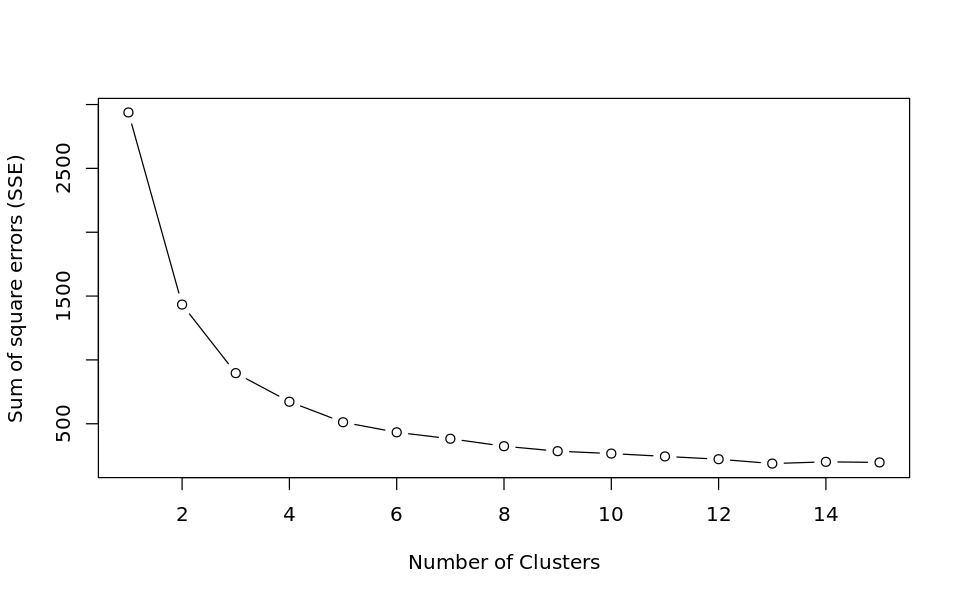

In [153]:
mydata <- scaledData
k_max <- 15
wss <- (nrow(mydata)-1)*sum(apply(mydata, 2, var))
for (i in 2:k_max) wss[i] <- sum(kmeans(mydata, centers=i)$withinss)
plot(1:k_max, wss, type="b", xlab="Number of Clusters",
     ylab="Sum of square errors (SSE)")

<h4>In the following we can se the impact of not scaling the data:<h4>

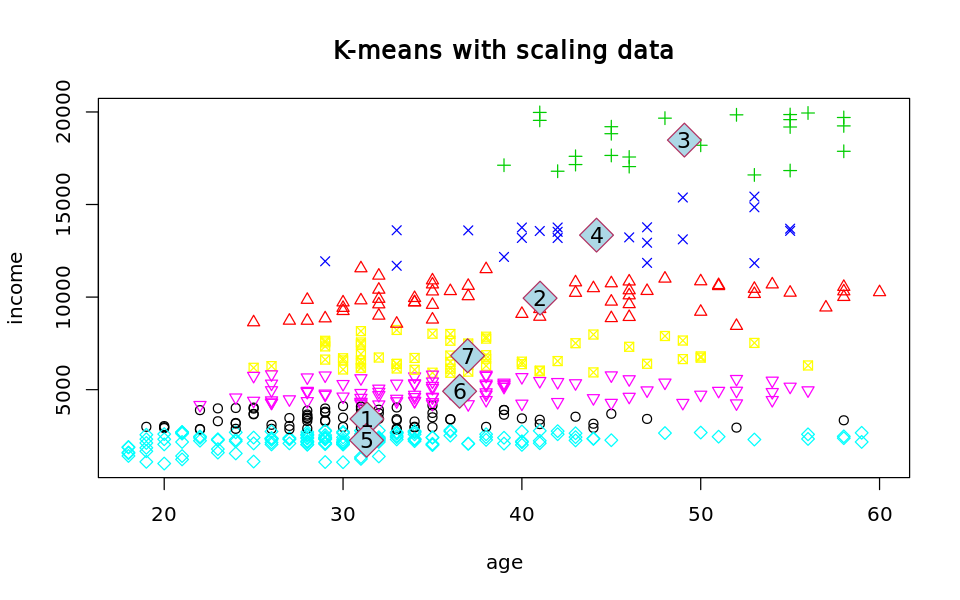

In [159]:
data_unscaled <- select(df, Age, MonthlyIncome)
Kmeans <- kmeans(data_unscaled, 7)

plot(data_unscaled$Age, data_unscaled$MonthlyIncome, col = Kmeans$cluster, #asp = 1, #xlim=c(1:90), ylim=c(200:178677),
     pch = Kmeans$cluster, main = "K-means with scaling data", 
     xlab = "age", ylab = "income")
points(Kmeans$centers[ ,1], Kmeans$centers[ ,2], pch = 23,
       col = 'maroon', bg = 'lightblue', cex = 3)
text(Kmeans$centers[ ,1], Kmeans$centers[ ,2], cex = 1.1,
     col = 'black', attributes(Kmeans$centers)$dimnames[[1]])


<h4>In the following we can see the impact of scaling the data:<h4>

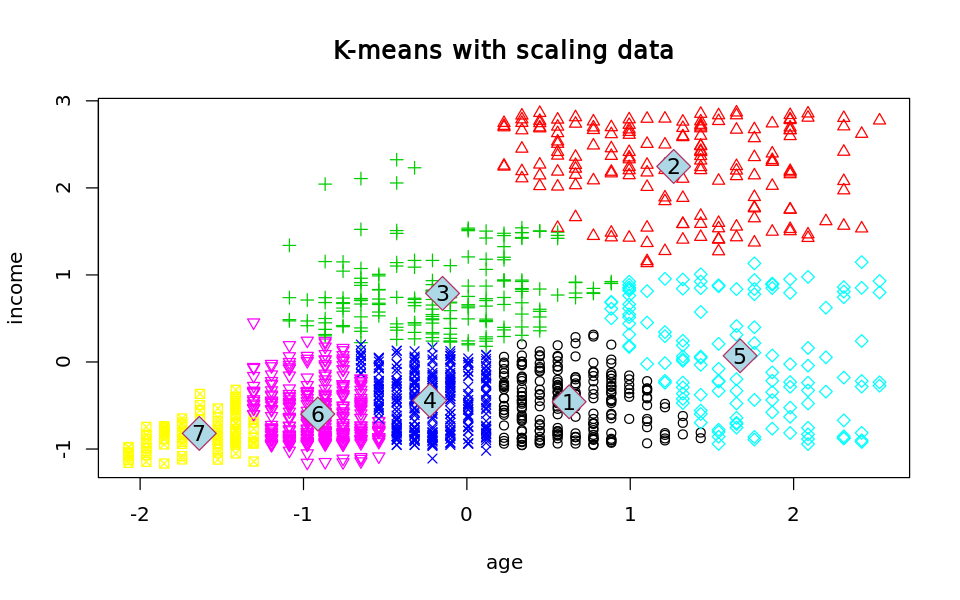

In [160]:
KmeansScaling <- kmeans(scaledData, 7)

plot(scaledData$scaledAge, scaledData$scaledIncome, col = KmeansScaling$cluster, #asp = 1, #xlim=c(1:90), ylim=c(200:178677),
     pch = KmeansScaling$cluster, main = "K-means with scaling data", 
     xlab = "age", ylab = "income")
points(KmeansScaling$centers[ ,1], KmeansScaling$centers[ ,2], pch = 23,
       col = 'maroon', bg = 'lightblue', cex = 3)
text(KmeansScaling$centers[ ,1], KmeansScaling$centers[ ,2], cex = 1.1,
     col = 'black', attributes(KmeansScaling$centers)$dimnames[[1]])

<h3>Classification<h3>
<h5>In the following a logistic regression classifier is trained and tested.<h5>

In [156]:
# Installing the package
#install.packages("caTools")    # For Logistic regression
#install.packages("ROCR")       # For ROC curve to evaluate model   
# Loading package
library(caTools)

#Balancing data: (undersampling)
yes <- which(df$Attrition == 'Yes')
no <- which(df$Attrition == 'No')
no <- sample(no, length(yes))
df <- df[c(no,yes),] 
df

#Converting Yes and No to 1 and 0:
df$Attrition <- ifelse(df$Attrition == 'Yes', 1, 0)

#Train/test split and Classification:
split <- sample.split(df, SplitRatio = 0.7)
   
train_reg <- subset(df, split == "TRUE")
test_reg <- subset(df, split == "FALSE")


logistic_model <- glm(Attrition ~., 
                      data = train_reg, 
                      family = "binomial")
   
# Summary
summary(logistic_model)
   
# Predict test data based on model
predict_reg <- predict(logistic_model, 
                       test_reg, type = "response")
predict_reg  

,Age,Attrition,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,scaledAge,scaledIncome
702,53,No,Travel_Rarely,2,Medical,3,Male,45,3,Manager,...,6,No,3,22,3,17,13,15,"1,7597738","1,77339536"
606,38,No,Travel_Frequently,12,Life Sciences,1,Male,45,2,Healthcare Representative,...,2,No,3,13,3,4,3,1,"0,1178048","-0,04565278"
1332,48,No,Travel_Rarely,10,Life Sciences,4,Male,91,2,Research Director,...,4,No,4,29,3,22,10,12,"1,2124508","2,79570721"
1000,42,No,Travel_Rarely,10,Human Resources,3,Female,31,3,Manager,...,0,No,3,21,5,20,7,0,"0,5556632","2,18695056"
824,29,No,Travel_Frequently,10,Life Sciences,4,Female,61,3,Research Scientist,...,0,No,4,8,2,7,5,1,"-0,8673766","-0,68223466"
377,51,No,Travel_Rarely,14,Life Sciences,3,Female,87,3,Sales Executive,...,4,No,3,18,2,7,7,0,"1,5408446","-0,33282618"
155,32,No,Travel_Frequently,8,Marketing,2,Female,43,3,Sales Executive,...,1,No,4,9,2,9,8,3,"-0,5389828","0,52996848"
844,26,No,Travel_Rarely,3,Medical,1,Male,82,4,Laboratory Technician,...,1,No,2,8,2,8,7,0,"-1,1957704","-0,44242787"
147,30,No,Travel_Rarely,2,Medical,2,Male,35,2,Laboratory Technician,...,0,No,4,6,3,5,3,1,"-0,7579120","-0,80351870"
1016,34,No,Travel_Frequently,1,Other,4,Male,91,3,Research Scientist,...,5,No,3,10,2,4,3,1,"-0,3200536","-0,74489454"


Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
glm(formula = Attrition ~ ., family = "binomial", data = train_reg)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2,3236  -0,6162   0,0651   0,6253   2,2589  

Coefficients: (2 not defined because of singularities)
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 8,922e-01  1,111e+00   0,803 0,421861    
Age                        -2,184e-02  2,328e-02  -0,938 0,348211    
BusinessTravel.L            3,699e-02  5,279e-01   0,070 0,944129    
BusinessTravel.Q           -6,663e-01  4,353e-01  -1,531 0,125840    
DistanceFromHome            6,306e-02  2,032e-02   3,103 0,001917 ** 
EducationField.L            7,509e-01  9,554e-01   0,786 0,431873    
EducationField.Q            1,961e-03  8,473e-01   0,002 0,998153    
EducationField.C           -3,635e-01  7,782e-01  -0,467 0,640384    
EducationField^4           -9,931e-01  6,561e-01  -1,514 0,130128    
EducationField^5           -7,969e-01  4,962e-01  -1,60

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”

702         155         147         747        1393         966 
0,056945579 0,164895480 0,257354393 0,009423434 0,162911844 0,069941567 
       1290        1308        1375         794         956        1447 
0,082958964 0,071044276 0,101658808 0,219180891 0,098913322 0,048267148 
        779         461         852        1400         857        1184 
0,315052029 0,920504448 0,029352710 0,022148443 0,918656298 0,015804527 
       1110         229         110        1300        1041         226 
0,774094181 0,544070195 0,404670303 0,001408389 0,002593312 0,040299055 
       1196         688          24        1470         411         543 
0,323648935 0,206714340 0,049875250 0,485029091 0,280940021 0,527233246 
       1044        1106         384        1262        1188        1152 
0,006460655 0,187626205 0,185255132 0,796952916 0,022239141 0,417796778 
        395           5        1176         866        1161         478 
0,056147689 0,600366204 0,059504622 0,610275535 0,014609030 0,882253135 
       1149         122         392        1449        1417          83 
0,147890266 0,449934617 0,159593402 0,018095645 0,094303488 0,113950832 
       1147        1405         304        1242         322         354 
0,119151892 0,208269011 0,231401368 0,516370818 0,005810689 0,575925935 
         44         989         257         737        1117        1010 
0,642444475 0,726360340 0,412742240 0,028117419 0,430751781 0,015836017 
        610         352        1001         310        1414        1227 
0,106248841 0,385358991 0,395123457 0,687878248 0,394708224 0,884152407 
        225         970         219         479           7         836 
0,223269759 0,013309308 0,394872972 0,666840958 0,825892479 0,583473342 
          3          37          43          52         101         103 
0,756182346 0,822308386 0,986998031 0,969820590 0,549008993 0,589247166 
        128         137         206         211         218         237 
0,928390306 0,682947755 0,173220439 0,401379646 0,444355933 0,831813154 
        240         289         297         367         369         383 
0,509273634 0,817052111 0,515110747 0,527004297 0,825334940 0,776237186 
        415         416         441         454         496         505 
0,991170965 0,243229342 0,938464885 0,397440274 0,090671849 0,811443661 
        526         548         563         592         599         661 
0,953683487 0,450116970 0,258139835 0,817277862 0,242556083 0,302912751 
        663         668         689         690         712         726 
0,433834870 0,555904486 0,951177087 0,951300126 0,609852074 0,488373679 
        762         763         780         792         793         814 
0,433311522 0,908883089 0,928712542 0,980858944 0,873933793 0,139528580 
        830         861         865         912         929         933 
0,983677183 0,226380913 0,605947706 0,998499237 0,015357200 0,964461858 
        954         976        1013        1017        1033        1040 
0,656761844 0,926221950 0,929111813 0,333492071 0,915659373 0,898430376 
       1057        1084        1107        1168        1172        1205 
0,913109640 0,265952520 0,220659707 0,958462272 0,959273863 0,718184740 
       1223        1224        1258        1272        1299        1313 
0,785544848 0,983710455 0,830697664 0,645304364 0,009395910 0,240369676 
       1333        1340        1354        1391        1397 
0,719243739 0,861007177 0,972802943 0,906941184 0,979787154

<h3>ROC CURVE<h3>
<h5>ROC curve visualization for a visual representation of the classifiers accuracy.<h5>

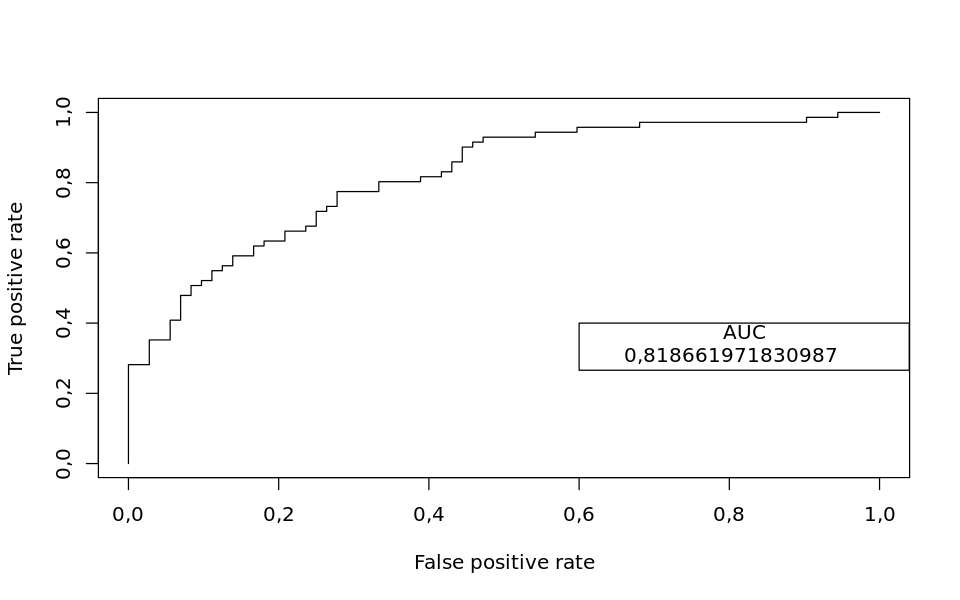

In [157]:
library(ROCR)
# ROC-AUC Curve
ROCPred <- prediction(predict_reg, test_reg$Attrition) 
ROCPer <- performance(ROCPred, measure = "tpr", 
                             x.measure = "fpr")
   
auc <- performance(ROCPred, measure = "auc")
auc <- auc@y.values[[1]]
   
# Plotting curve
plot(ROCPer)


legend(.6, .4, auc, title = "AUC", cex = 1)

In [158]:
# Threshholding:
predict_reg <- ifelse(predict_reg > 0.5, 1, 0)
   
# Evaluating model accuracy
table(test_reg$Attrition, predict_reg)

missing_classerr <- mean(predict_reg != test_reg$Attrition)
print(paste('Accuracy =', 1 - missing_classerr))

   predict_reg
     0  1
  0 54 18
  1 21 50

[1] "Accuracy = 0,727272727272727"
